# **This is what an end to end scikit learn Workflow looks like**
1. **Getting data ready**
2. **choosing the right estimator / algorithm to work for your problem**
3. **fit the model / evaluator and use it to make predictions**
4. **evaluate the model**
5. **improve the model**
6. **save and load the trained model**
7. **putting it all together**

### 1) Getting the data ready to be used with machine learning
The three main things that we have to do are:
  * Split the data into *features* and *labels* (Usually `X` and `Y`)
  * *filling* (aka *imputing*) or disregarding missing values
  * converting non numerical values to numerical values (aka *feature encoding*)

In [1]:
# 1) get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop("target", axis = 1) #axis = 1 signifies the column
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [6]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
X.shape[0] * 0.8, X_train.shape[0]

(242.4, 242)

In [8]:
242 + X_test.shape[0]

303

In [9]:
X.shape, len(heart_disease)

((303, 13), 303)

## Make sure all data is numerical 

In [10]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [11]:
car_sales["Doors"].value_counts()
#Since 4 doors can be fit into a category along with 856 other cars, doors is also considered as a categorical variable !!

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [12]:
len(car_sales), car_sales.dtypes

(1000,
 Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object)

In [13]:
# Split into X / Y
Xc = car_sales.drop("Price",axis = 1)
Yc = car_sales["Price"]

# Split into train and test models
Xc_train, Xc_test, Yc_train, Yc_test = train_test_split(Xc,Yc,test_size = 0.2)

Xc.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


# Important step -> converting a categorical column to a numerical column

In [14]:
# To turn categorical values into numerical values use this
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one-hot",one_hot,categorical_features)],remainder = "passthrough")
transformed_Xc = transformer.fit_transform(Xc)
transformed_Xc

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [15]:
pd.DataFrame(transformed_Xc).head() #Our converted dataframe is ready

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [16]:
# Method 2 to do the same thing but this time using pandas
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]],dtype = int)
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


## Now thats out of the way, lets refit our model

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
model = RandomForestRegressor()
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_Xc, Yc, test_size=0.2)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Now you can use the model for prediction or evaluation

RandomForestRegressor()

In [18]:
model.score(X_test,Y_test)

0.3235867221569877

## What if there is missing data? 

In [19]:
# Importing car sales with missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [20]:
car_sales_missing.isna().sum() #No of rows that have missing values

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [21]:
# First lets segregate it into xcsm and ycsm
xcsm = car_sales_missing.drop("Price",axis = 1)
ycsm = car_sales_missing["Price"]

In [22]:
# Filling the Make column
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")

# Filling the Colour column
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")

# Filling the Odometer (KM) column
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

# Filling the Doors column
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [23]:
# Removing rows with missing Price values
car_sales_missing.dropna(inplace = True)
car_sales_missing.isna().sum() # This shows us that no column has any missing data

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [24]:
len(car_sales_missing)

950

In [25]:
# Now converting all categorical columns to numerical columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catrgorical_vars = ["Make","Colour","Doors"]
one_hot_encoder = OneHotEncoder()
new_transformer = ColumnTransformer([["one_hot_encoder", one_hot_encoder, catrgorical_vars]],remainder="passthrough")

New_Xcsm = new_transformer.fit_transform(xcsm)
New_Xcsm

# Since this is a newer version of scikit learn, NaN and None values are automatically taken care of

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### OPTION 2) fill missing values with Scikit-learn

In [26]:
car_sales_missing_scikit = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing_scikit.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [27]:
# Drop the rows with no labels
car_sales_missing_scikit.dropna(subset = ["Price"], inplace = True)
car_sales_missing_scikit.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [28]:
X_sc_csm = car_sales_missing_scikit.drop("Price", axis = 1)
Y_sc_csm = car_sales_missing_scikit["Price"]

In [29]:
from sklearn.model_selection import train_test_split
X_sc_csm_train, X_sc_csm_test, Y_sc_csm_train,  Y_sc_csm_test = train_test_split(X_sc_csm,Y_sc_csm,test_size=0.2)

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill values
cat_imputer = SimpleImputer(strategy = "constant", fill_value="missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy= "mean")

# Declare Types of columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                             ("door_imputer", door_imputer,door_feature),
                             ("num_imputer", num_imputer, num_feature)])

# Converting the data into a table
filled_X_train =imputer.fit_transform(X_sc_csm_train)
filled_X_test =imputer.transform(X_sc_csm_test)

filled_X_train

array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [31]:
filled_X_sc_csm_train = pd.DataFrame(filled_X_train,columns = ["Make","Colour","Doors","Odometer (KM)"])
filled_X_sc_csm_test = pd.DataFrame(filled_X_test,columns = ["Make","Colour","Doors","Odometer (KM)"])
filled_X_sc_csm_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4.0,86696.0
1,Toyota,Black,4.0,20714.0
2,Toyota,White,4.0,134415.0
3,Toyota,Green,4.0,130710.230137
4,Honda,White,4.0,145850.0


In [32]:
filled_X_sc_csm_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [33]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(filled_X_sc_csm_train)
transformed_X_test = transformer.transform(filled_X_sc_csm_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.66960e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.07140e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.34415e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.24900e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.94820e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.99833e+05]])

## Now let us fit our dataset into a model

In [34]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, Y_sc_csm_train)
model.score(transformed_X_test, Y_sc_csm_test)

0.09497633411335504

In [35]:
# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

## Choosing the Right Estimator/Algorithm for Our Problem

1. **Sklearn Estimators:**
   - Sklearn refers to machine learning models and algorithms as estimators.
   - Examples include classifiers (`clf`) for classification problems and regressors (`reg`) for regression problems.

2. **Classification Problem:**
   - Predicting a category (e.g., heart disease or not).
   - Points related to classification:
     - Sklearn uses classifiers (`clf`) for classification tasks.
     - Choose appropriate classifiers based on problem complexity, data size, and performance requirements.

3. **Regression Problem:**
   - Predicting a number (e.g., selling price of a car).
   - Points related to regression:
     - Sklearn provides regressors (`reg`) for regression tasks.
     - Consider factors such as linearity, complexity, and interpretability when selecting regression algorithms.

4. **Sklearn Machine Learning Map:**
   - If you're unsure about which model to use in Sklearn for your problem, refer to the [Sklearn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for guidance.

---

**Additional Note:**
- When choosing an estimator or algorithm, consider factors such as data characteristics, model interpretability, computational efficiency, and performance metrics.


![Sklearn Machine Learning Map](ml_map.png)


## Picking a machine learning model for a regression problem 

In [36]:
#Using the california housing dataset
# DataSet used -> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [37]:
housing_df = pd.DataFrame(housing["data"],columns = housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [38]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Experimenting by using a new ML Model

In [39]:
# Importing all the important parameters
from sklearn.model_selection import train_test_split 

#importing models (EXPERIMENTAL)
from sklearn.linear_model import Ridge

# Now to run our model, we must first split the data into X and Y
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis = 1)
Y = housing_df["target"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

#Instantiate and fit the model
model = Ridge()
model.fit(X_train,Y_train)

#Check the score
model.score(X_test,Y_test)

0.5758549611440127

### What if `Ridge` didnt work?
### We can always try a different model!!

### Were going to use the `ensemble` model ( Which consists of many submodels that improve the prediction of our target)
- inside the ensemble model we are going to use the `RandomForestRegressor` which uses many decision trees to carry out the predictions
- the value of n_estimators signifies the number of decision trees that are going to be used to carry out the prediction

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Now to run our model, we must first split the data into X and Y
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis = 1)
Y = housing_df["target"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

#Instantiate and fit the model
model = RandomForestRegressor()
model.fit(X_train,Y_train)

#Check the score
model.score(X_test,Y_test)

0.8065734772187598

## 2) Picking a model for a Classification problem

In [41]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Going by the map, the first model that we encounter is `LinearSVC`

In [42]:
# Splitting into x and y
X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

np.random.seed(42)

# Splitting into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# importing our model
from sklearn import svm
model = svm.SVC()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.7049180327868853

### Going by the map, we shall try to improve our model by using `from sklearn.ensemble import RandomForestClassifier`

In [43]:
# Splitting into x and y
X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

np.random.seed(42)

# Splitting into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# importing our model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8524590163934426

### Tidbit:

1. If you have **structured data**, used `ensemble` methods
2. If you have **unstructured data**, use `deep learning` or `transfer learning`

## 3) Making predictions with our models !!!
- There are **2** Ways to make predictions
  - `predict()`
  - `predict_proba()`

In [44]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

## Now we can compare these 2 to see if our prediction was right or wrong
- To find the `R**2` manually do this:
- There are **3** ways to do this 

In [46]:
from sklearn.metrics import accuracy_score
Y_preds = model.predict(X_test)
np.mean(Y_preds == Y_test) , model.score(X_test, Y_test) , accuracy_score(Y_preds, Y_test)

(0.8524590163934426, 0.8524590163934426, 0.8524590163934426)

## Making predictions with the `predict_proba()` function

In [47]:
model.predict_proba(X_test)[:5] # Basically tells us the prob with which the predication is being made ( Higher the better )

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [48]:
model.predict(X_test)[:5] # As we can see whenever the prob on the left is more, the ans is 0 else the ans is 1

array([0, 1, 1, 0, 1], dtype=int64)

## `predict()` can also be used for regression models

In [49]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [50]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor

# Creating the X and Y Labels
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

np.random.seed(42)

# Splitting them into test and train models
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)  # Corrected parameter name

# Using our regression model
model = RandomForestRegressor()  # Corrected model type
model.fit(X_train, Y_train)

# Now making the prediction
Y_pred = model.predict(X_test)

In [51]:
Y_pred[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [52]:
np.array(Y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

## Comparing the predictions to the truth

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_pred, Y_test) 

0.32659871732073664

## Evaluating a Machine Learning Model

There are three ways to evaluate Scikit-Learn models/estimators:

1. **Estimator's built-in score() method:**
   - Many estimators in Scikit-Learn have a built-in `score()` method that calculates a default evaluation metric specific to the estimator's task (e.g., accuracy for classifiers, R-squared for regressors).

2. **The scoring parameter:**
   - Scikit-Learn provides a `scoring` parameter in functions like `cross_val_score` and `GridSearchCV` to specify a custom evaluation metric different from the default one provided by the estimator.

3. **Problem-specific metric functions:**
   - For more control and customization, you can use problem-specific metric functions from Scikit-Learn or other libraries to evaluate the model's performance using metrics such as precision, recall, F1-score, mean squared error, etc.

You can read more about model evaluation in Scikit-Learn [here](https://scikit-learn.org/stable/modules/model_evaluation.html).


In [54]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & Y
X = heart_disease.drop("target",axis = 1)
Y = heart_disease["target"]

# Create Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

# Create Classifier Model Instance
model = RandomForestClassifier()
model.fit(X_train, Y_train)

model.score(X_train,Y_train), model.score(X_test,Y_test)

(1.0, 0.8524590163934426)

### In regression `.score()` gives the `r^2` (**coefficient of determination**)
### In classification `.score()` gives the  (**mean accuracy**)

## 4.2) Evaluating a model from `.score()`

In [55]:
from sklearn.model_selection import cross_val_score

# Importing the model
from sklearn.ensemble import RandomForestRegressor

# Creating the X and Y Labels
X = housing_df[:100].drop("target", axis=1)
Y = housing_df["target"][:100]

np.random.seed(42)

# Splitting them into test and train models
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)  # Corrected parameter name

# Using our regression model
model = RandomForestRegressor()  # Corrected model type
model.fit(X_train, Y_train)

RandomForestRegressor()

In [56]:
model.score(X_test,Y_test)

0.8217853720557672

In [57]:
cross_val_score(model,X,Y) # Converts into groups of 20% (cv = 5 by default) and checks the score # BETTER THAN SCORE

array([-0.99250096, -0.16487005,  0.27471964, -3.41945783, -0.35756606])

In [58]:
cross_val_score(model,X,Y,cv = 10,scoring = None) #scoring = None sets the scoring method to the default scoring method (Mean accuracy)

array([-2.11978626e+00,  4.29200519e-02, -3.35320410e-01,  1.46807325e-01,
        5.75893723e-02, -1.74560511e+00, -2.93253698e+01,  8.11995717e-02,
       -1.30853446e-03, -1.65769790e+01])

## Classification Model Evaluation Metrics 
- Accuracy
- Area under `ROC` curve
- Confusion Matrix
- Classification Report

In [59]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & Y
X = heart_disease.drop("target",axis = 1)
Y = heart_disease["target"]

# Create Classifier Model Instance
model = RandomForestClassifier()
model.fit(X, Y)

cross_val_score(model,X,Y), np.mean(cross_val_score(model,X,Y))

(array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.75      ]),
 0.8281420765027322)

**Area under the receiver operating curve**

* Area Under Curve(AUC)
* ROC Curve

ROC curves are a comparison of the models True Positive Rate (TPR) vs the models False Positive Rate (FPR)
* True Positive = Model predicts 1 when target == 1
* False Positive = Model predicts 1 when target == 0 
* True Negative = Model predicts 0 when target == 0
* False Negative = Model predicts 0 when target == 1 

In [60]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & Y
X = heart_disease.drop("target",axis = 1)
Y = heart_disease["target"]

# Create Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

# Create Classifier Model Instance
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [61]:
from sklearn.metrics import roc_curve

Y_probs = model.predict_proba(X_test)
Y_probs[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [62]:
Y_probs_positive = Y_probs[:,1] # 1 because were only conisdering the positive values
Y_probs_positive[:5]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [63]:
# Calculate fpr, tpr, thresholds
fpr,tpr,thresholds = roc_curve(Y_test,Y_probs_positive)

# Looking at the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [64]:
import matplotlib.pyplot as plt

def roc_plot(fpr,tpr):
    '''
    PLots a Roc curve given the False Positive Rate (fpr), True Positive Rate (tpr)  
    '''
    plt.plot(fpr,tpr,color = "orange",label = "ROC")

    # Comparing the plot to an arbitrary plot that shows nothing
    plt.plot([0,1],[0,1],color = "darkblue",linestyle = "--", label = "Guessing")

    # Customize the plot
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

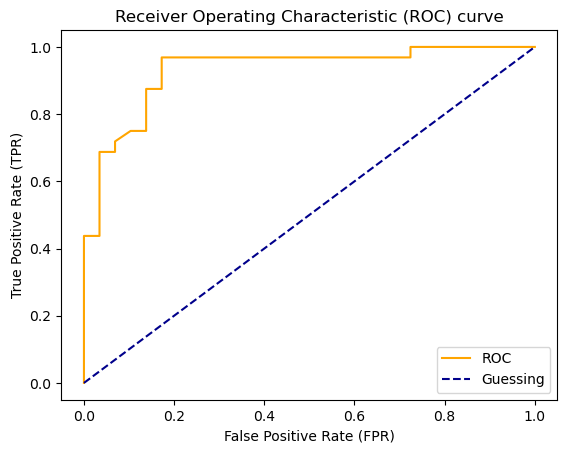

In [65]:
roc_plot(fpr,tpr);

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_probs_positive)

0.9304956896551724

**Confusion Matrix**
- A confusion matrix shows us a quick way to compare labels a model predicts and the actual labels it was supposed to predict
- In essence it is giving you the idea of where the model is getting confused

In [67]:
# Creating our Confusion matrix using crosstab
pd.crosstab(Y_test,Y_preds,rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [68]:
24+4+5+28

61

In [69]:
len(X_test)

61

In [73]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



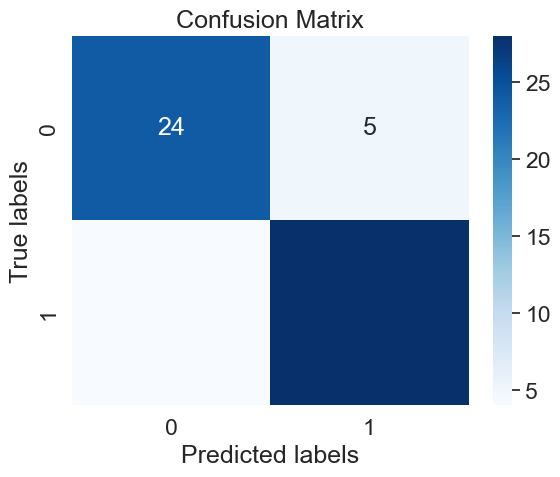

In [77]:
# Import necessary libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have Y_test and Y_preds defined elsewhere in your code

# Set the font scale
sns.set(font_scale=1.5)

# Creating the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_preds)

# Plotting it using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()